

**1. 최단 거리 경로 문제****이론**

-  **최단 경로**: 두 점 사이의 최단 경로를 찾는 문제로, 이 경우 최단 경로는 직선입니다. 변분법을 사용하여 두 점 사이의 경로 중 가장 짧은 경로를 찾을 수 있습니다.
-  **에너지의 원리**: 최단 경로 문제는 에너지 최소화 문제로 해석할 수 있습니다. 두 점 사이의 경로 길이를 나타내는 함수의 길이를 최소화하는 것이 목표입니다.

**수식**

-  **거리 함수**: 두 점 $(x_0 ,y_0 )$ 와 $(x_1 ,y_1 )$ 사이의 경로 길이는 다음과 같이 정의됩니다.

$$L[y]=\int_{x_0 }^{x_1 } \sqrt{1+{\left(\frac{dy}{dx}\right)}^2 }\,dx$$

-  여기서 $y=y(x)$ 는 $x_0$ 에서 $x_1$ 까지 가는 경로를 나타냅니다.

-  **변분법**: 이 길이 $L[y]$ 를 최소화하기 위해 오일러\-라그랑주 방정식을 사용합니다.

$$\frac{d}{dx}\left(\frac{\partial F}{\partial y^{\prime } }\right)-\frac{\partial F}{\partial y}=0$$

-  여기서 $F=\sqrt{1+(y^{\prime } )^2 }$ ​이며, $y^{\prime } =\frac{dy}{dx}$ ​입니다.​​

In [1]:
% 최단 거리 경로 찾기 (수정된 변분법 사용)

% x 좌표 설정
x = linspace(0, 1, 100);

% 초기 y 값 설정 (수평 직선)
y_initial = 0.5 * ones(size(x));

% 목적 함수 정의 (거리 최소화)
objective = @(y) sum(sqrt(1 + diff(y).^2));

% fminunc 옵션 설정
options = optimoptions('fminunc', 'Display', 'iter', 'Algorithm', 'quasi-newton');

% 최적화 실행
[y_optimal, fval] = fminunc(objective, y_initial, options);

                                                        First-order 
 Iteration  Func-count       f(x)        Step-size       optimality
     0         101               99                             0
초기점이 국소 최솟값입니다.
초기점에서 기울기의 크기가 최적성 허용오차의 
값보다 작기 때문에 최적화가 완료되었습니다.
<중지 기준 세부 정보>


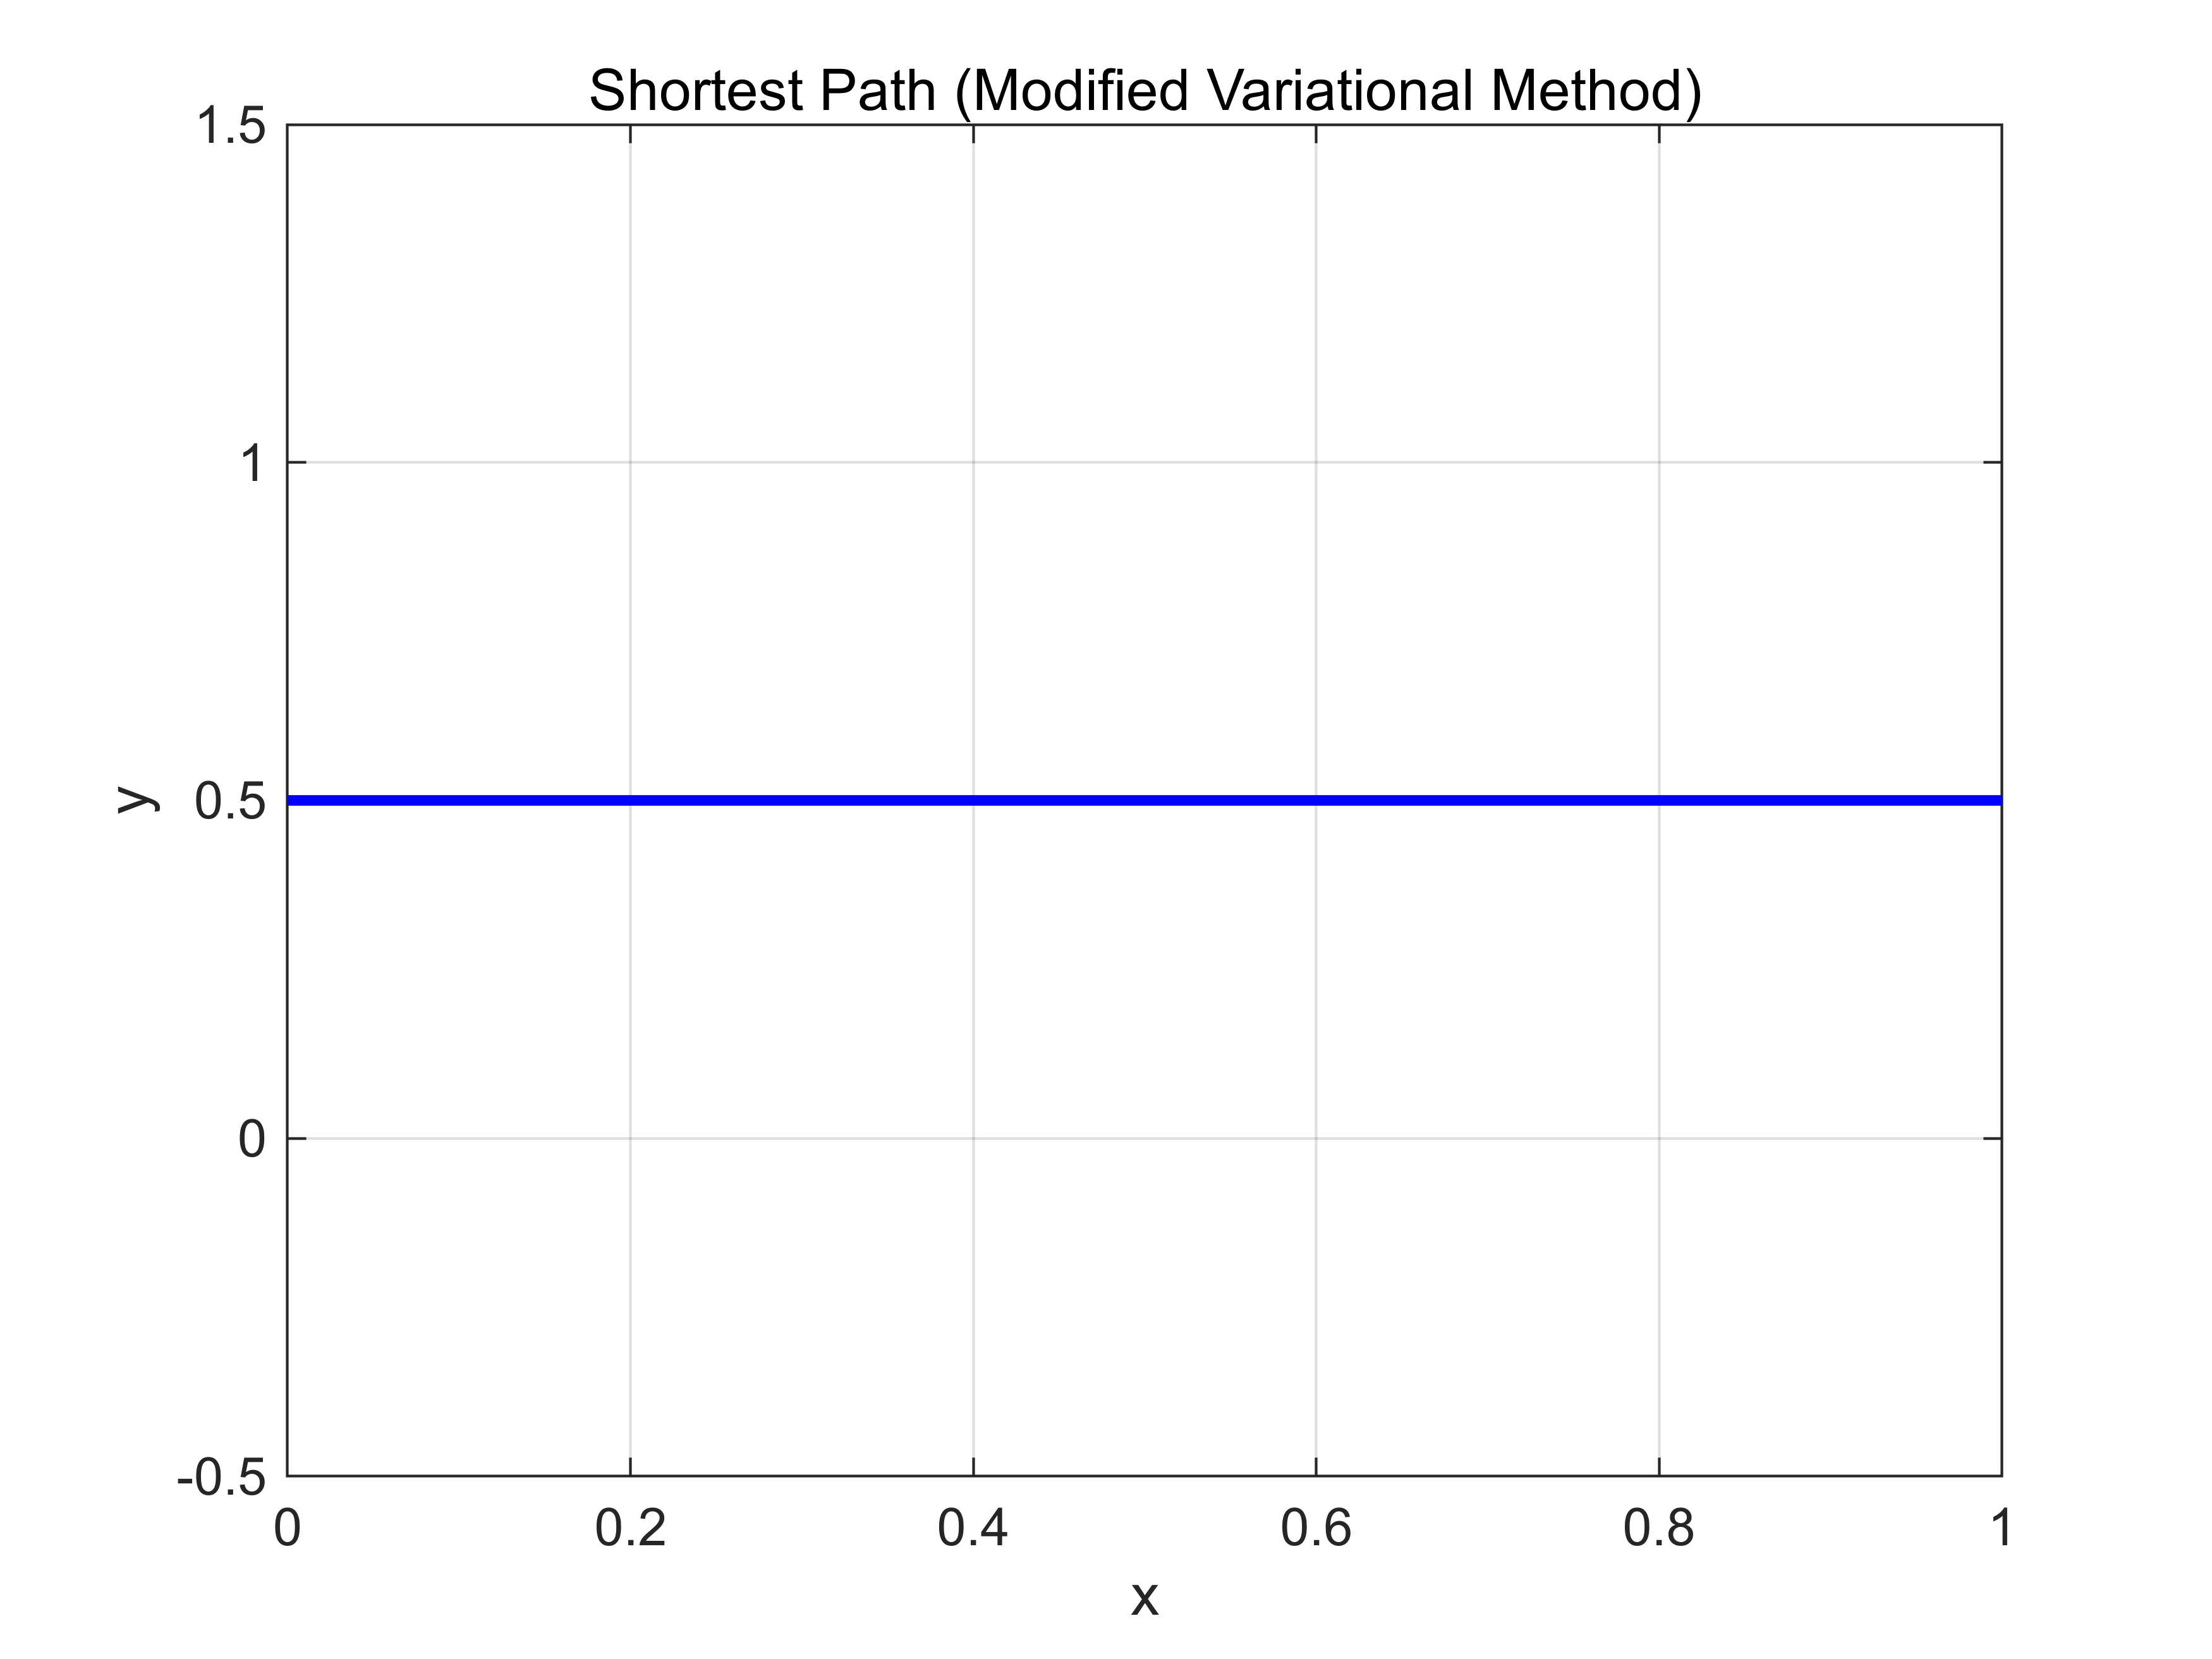

In [2]:

% 결과 그래프 그리기
figure;
plot(x, y_optimal, 'b-', 'LineWidth', 2);
xlabel('x');
ylabel('y');
title('Shortest Path (Modified Variational Method)');
grid on;



**2. 단순 진자의 운동****이론**

-  **진자의 운동**: 단순 진자의 운동은 운동 에너지와 위치 에너지 사이의 상호 작용으로 설명할 수 있습니다. 변분법을 사용하여 진자의 주기를 최소화하거나 최적 경로를 찾는 문제로 모델링할 수 있습니다.
-  **에너지 보존**: 진자의 전체 에너지는 운동 에너지와 위치 에너지의 합으로 구성되며, 진자의 주기나 경로를 최적화하기 위해 에너지를 최소화하는 방법을 사용합니다.

**수식**

-  **운동 에너지**: 진자의 운동 에너지 $T$ 는 다음과 같이 정의됩니다.

$$T=\frac{1}{2}L^2 {\left(\frac{d\theta }{dt}\right)}^2$$

-  여기서 $L$ 은 진자의 길이, $\theta$ 는 진자의 각도입니다.
-  **위치 에너지**: 위치 에너지 $U$ 는 중력에 의한 높이로부터 정의됩니다.

$$U=-mgL(1-\cos \theta )$$

-  여기서 $m$ 은 진자의 질량, $g$ 는 중력 가속도입니다.
-  **라그랑지안**: 라그랑지안 $\mathcal{L}$ 은 운동 에너지와 위치 에너지의 차이로 정의됩니다.

$$\mathcal{L}=T-U=\frac{1}{2}L^2 {\left(\frac{d\theta }{dt}\right)}^2 +mgL(1-\cos \theta )$$

-  **최적화 목적 함수**: 변분법을 사용하여 진자의 에너지를 최소화하는 경로를 찾기 위해 다음 목적 함수를 사용합니다.

$$\int \left(\frac{L^2 }{2}{\left(\frac{d\theta }{dt}\right)}^2 +gL(1-\cos \theta )\right)\,dt$$

In [3]:
% 단순 진자의 운동 (수정된 변분법 사용)

% 중력 가속도
g = 9.81;

% 진자 길이
L = 1;

% 초기 각도 설정
theta_initial = linspace(0, pi/4, 100);

% 목적 함수 정의 (진자의 운동 시간 최소화)
objective = @(theta) sum(1 ./ sqrt(1 - sin(theta).^2));

% fminunc 옵션 설정
options = optimoptions('fminunc', 'Display', 'iter', 'Algorithm', 'quasi-newton');

% 최적화 실행
[theta_optimal, fval] = fminunc(objective, theta_initial, options);

                                                        First-order 
 Iteration  Func-count       f(x)        Step-size       optimality
     0         101          112.306                          1.41
     1         202          100.254       0.707106          0.223  
     2         303          100.029              1         0.0758  
     3         404              100              1        0.00474  
     4         505              100              1        0.00069  
     5         606              100              1       3.53e-05  
     6         707              100              1       2.86e-06  
     7         808              100              1       9.54e-07  
국소 최솟값을 찾았습니다.
기울기의 크기가 최적성 허용오차의
값보다 작기 때문에 최적화가 완료되었습니다.
<중지 기준 세부 정보>


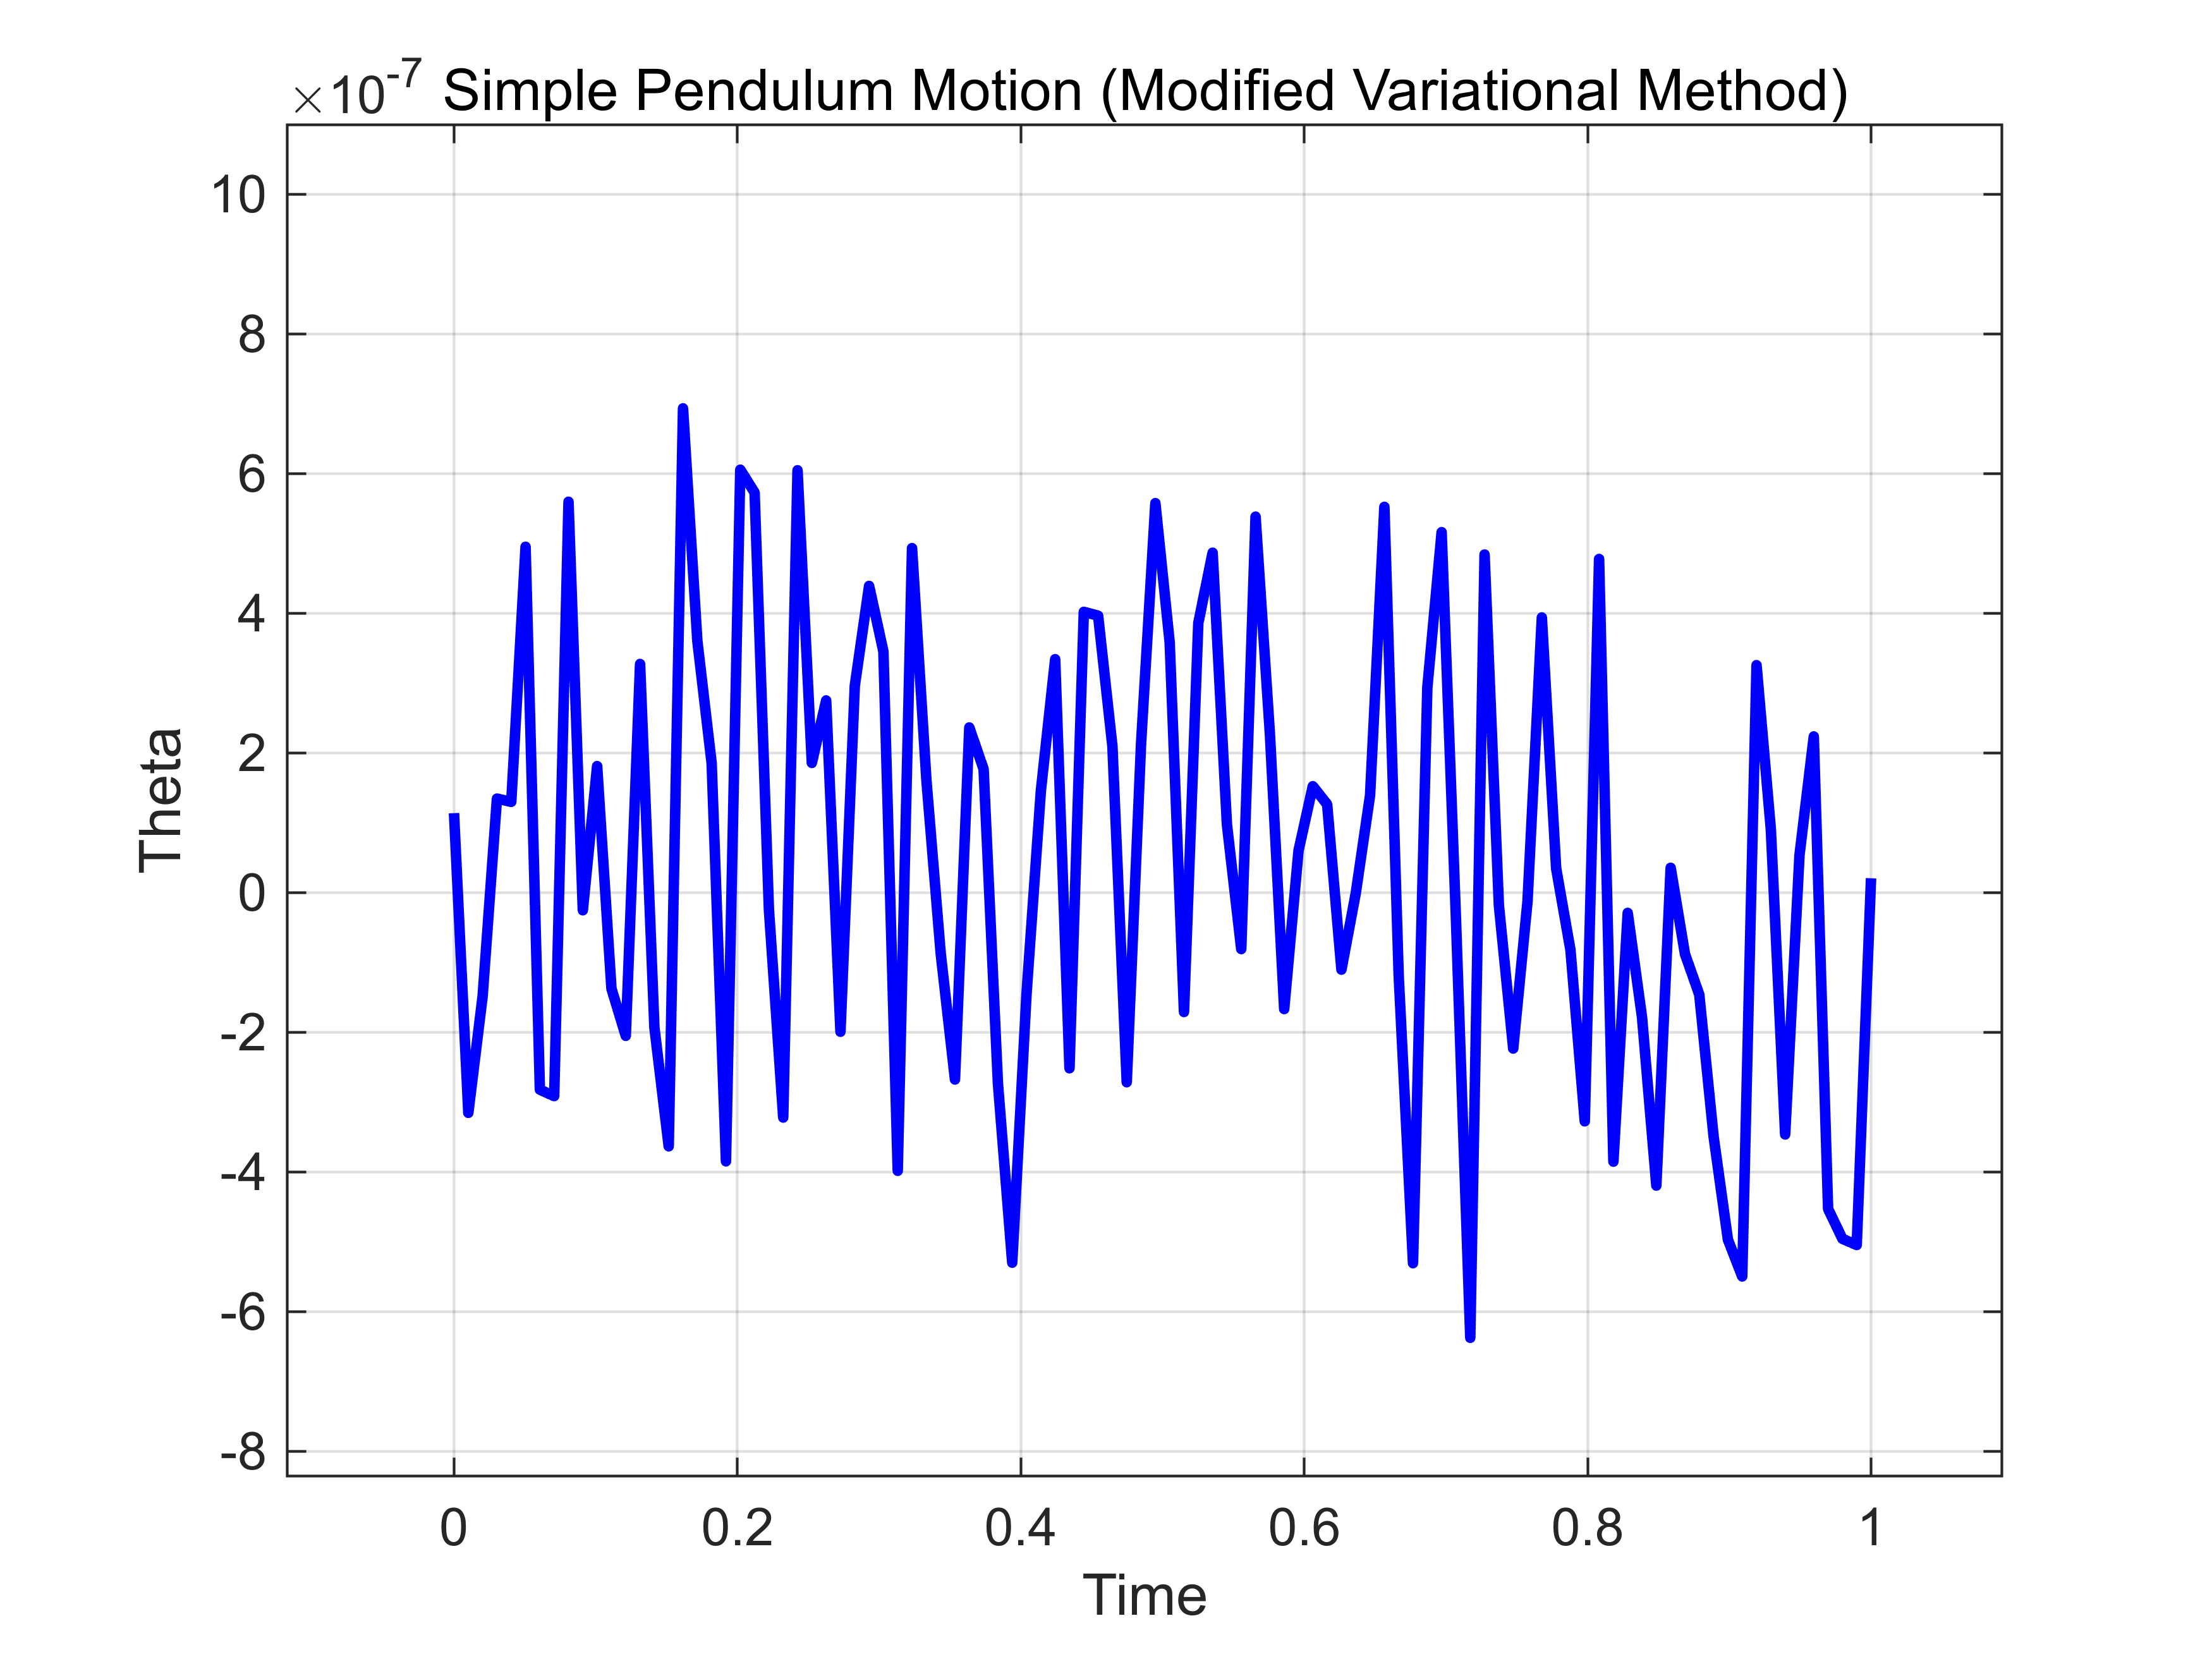

In [4]:

% 결과 그래프 그리기
figure;
plot(linspace(0, 1, 100), theta_optimal, 'b-', 'LineWidth', 2);
xlabel('Time');
ylabel('Theta');
title('Simple Pendulum Motion (Modified Variational Method)');
grid on;



**3. 포물선 경로 최적화****이론**

-  **포물선 경로**: 포물선 경로 최적화는 특정 경로의 길이를 최소화하는 문제입니다. 물체의 이동이나 투사체의 궤적을 설명할 때 사용되는 포물선 경로를 최적화하는 것이 목표입니다.
-  **길이 최소화**: 변분법을 사용하여 경로의 길이를 최소화하는 것이 목표입니다. 이 문제는 특정 경로를 따라 이동하는 데 드는 최소 거리나 최소 시간을 찾는 데 사용됩니다.

**수식**

-  **경로 길이**: 경로의 길이는 다음과 같이 정의됩니다.

$$L[y]=\int_{x_0 }^{x_1 } \sqrt{1+{\left(\frac{dy}{dx}\right)}^2 }\,dx$$

-  **변분법**: 이 경로 길이를 최소화하기 위해 오일러\-라그랑주 방정식을 사용하여 최적화 경로를 찾습니다.

$$\frac{d}{dx}\left(\frac{\partial F}{\partial y^{\prime } }\right)-\frac{\partial F}{\partial y}=0$$

-  여기서 $F=\sqrt{1+(y^{\prime } )^2 }$ 이며, 목적 함수는 이 함수의 적분을 최소화하는 것입니다.

In [5]:
% 포물선 경로 최적화 (수정된 변분법 사용)

% x 좌표 설정
x = linspace(0, 1, 100);

% 초기 y 값 설정 (수평 직선)
y_initial = x .* (1 - x);

% 목적 함수 정의 (포물선 경로의 길이 최소화)
objective = @(y) sum(sqrt(1 + diff(y).^2));

% fminunc 옵션 설정
options = optimoptions('fminunc', 'Display', 'iter', 'Algorithm', 'quasi-newton');

% 최적화 실행
[y_optimal, fval] = fminunc(objective, y_initial, options);

                                                        First-order 
 Iteration  Func-count       f(x)        Step-size       optimality
     0         101          99.0017                          0.01
     1         202          99.0016              1           0.01  
     2         303          99.0015              1         0.0048  
     3         404          99.0014              1        0.00469  
     4         505          99.0014              1        0.00465  
     5         606          99.0013              1        0.00404  
     6         707          99.0012              1        0.00488  
     7         808          99.0011              1        0.00449  
     8         909          99.0011              1        0.00442  
     9        1010           99.001              1        0.00418  
    10        1111          99.0009              1        0.00393  
    11        1212          99.0009              1        0.00361  
    12        1313          99.0008              


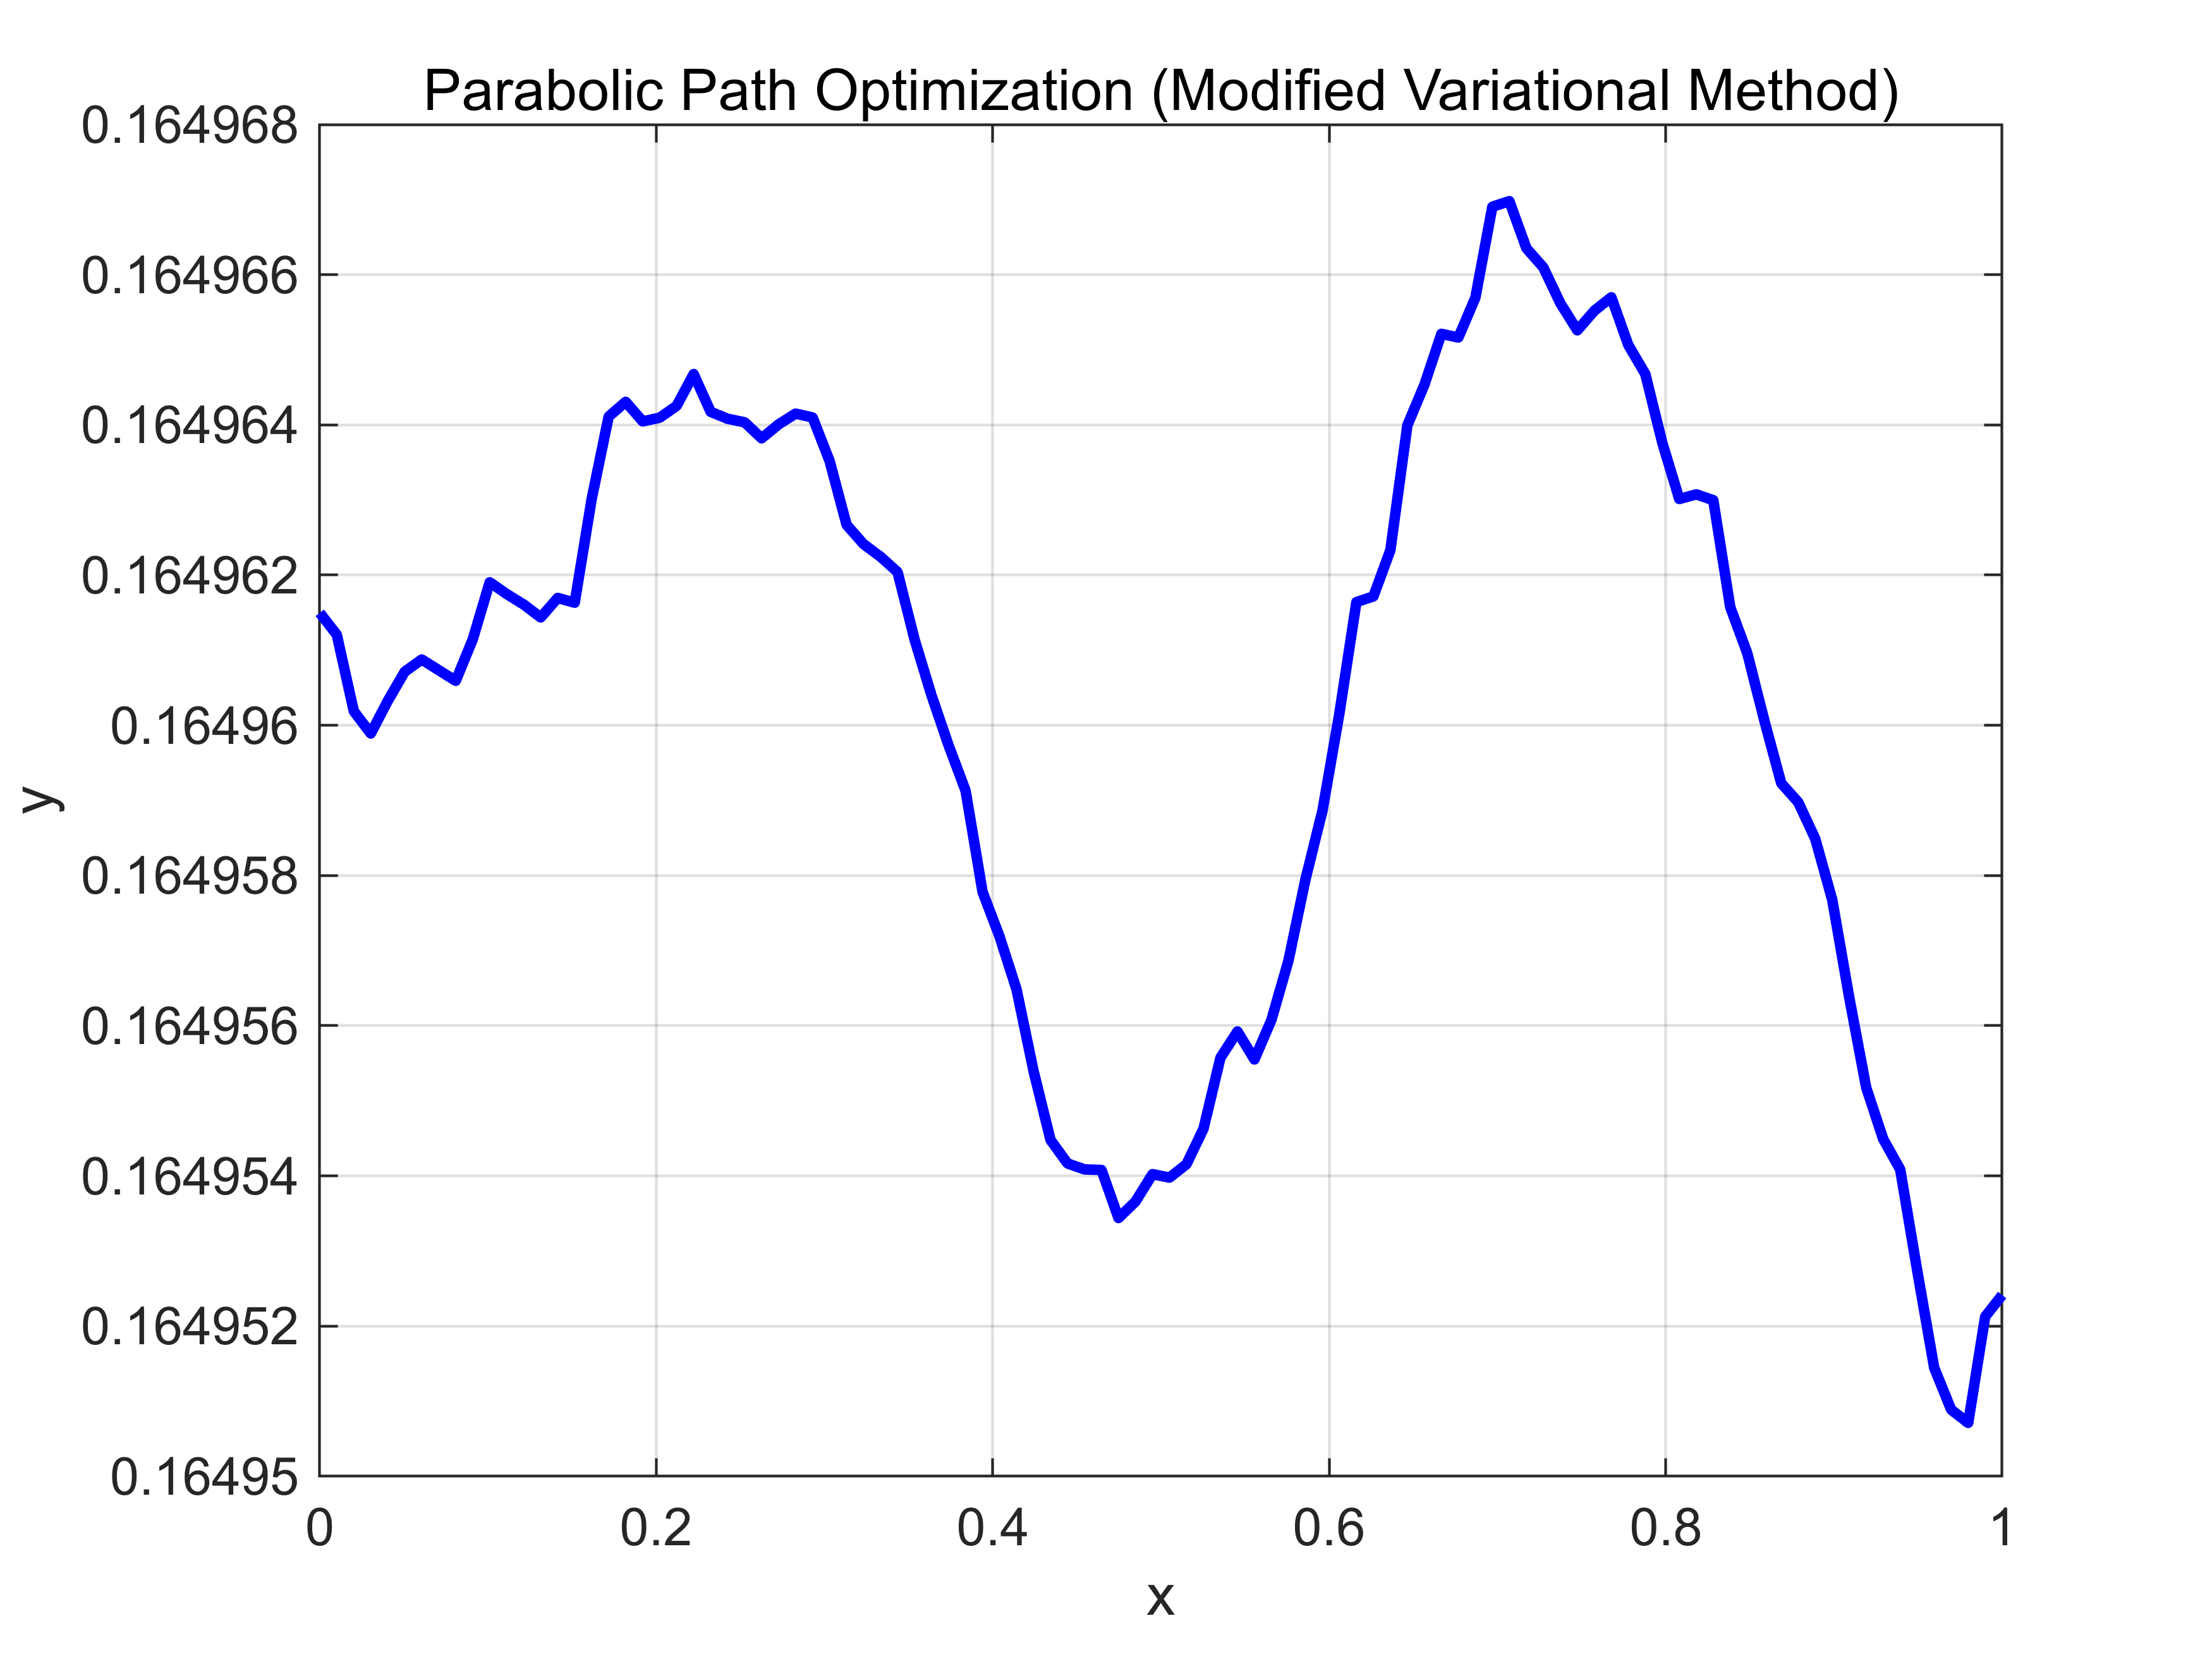

In [6]:

% 결과 그래프 그리기
figure;
plot(x, y_optimal, 'b-', 'LineWidth', 2);
xlabel('x');
ylabel('y');
title('Parabolic Path Optimization (Modified Variational Method)');
grid on;


**1. 직분법 (Direct Method)**


**이론**

-  **직분법**은 구조물의 각 요소에 작용하는 힘의 평형을 직접적으로 사용하여 해석을 진행합니다.
-  구조물의 각 요소에 대한 변형과 내부 힘을 구하기 위해 강성 행렬을 구성합니다.
-  강성 행렬은 요소의 변형과 그에 대응하는 힘 사이의 관계를 나타냅니다.
-  이러한 요소별 강성 행렬을 조합하여 전체 구조의 강성 행렬을 구성하고, 이를 통해 구조물 전체의 변위를 계산합니다.

**수식**

-  **요소 강성 행렬**: 캔틸레버 보의 한 요소에 대한 강성 행렬 kkk은 다음과 같이 구성됩니다.

 $k=\frac{EI}{L^3 }$ $\left\lbrack \begin{array}{cccc} 12 & 6L & -12 & 6L\newline 6L & {4L}^2  & -6L & {2L}^2 \newline -12 & -6L & 12 & -6L\newline 6L & {2L}^2  & -6L & {4L}^2  \end{array}\right\rbrack$ ​​

-  여기서 $E$ 는 탄성 계수, $I$ 는 단면 2차 모멘트, $L$ 은 요소의 길이입니다.
-  이 행렬은 요소의 변위와 회전 각도에 대한 힘과 모멘트를 나타냅니다.

-  **전체 강성 행렬**: 각 요소의 강성 행렬을 전체 구조의 강성 행렬에 더해주는 방식으로 전체 강성 행렬 $K$ 를 구성합니다.

 $K_{\textrm{global}} =\sum_{i=1}^n k_i$ ​

-  $k_i$ ​는 각 요소의 강성 행렬입니다.
-  전체 구조의 강성 행렬은 모든 요소의 강성 행렬을 더하여 얻습니다.

-  **평형 방정식**: 외력 벡터 $F$ 와 변위 벡터 $u$ 사이의 관계는 다음과 같이 표현됩니다.

$$K_{\textrm{global}} u=F$$

-  $K_{\textrm{global}}$ ​은 전체 강성 행렬, $u$ 는 변위 벡터, $F$ 는 외력 벡터입니다.
-  위의 식을 통해 구조물의 각 지점에서 변위를 계산할 수 있습니다.

-  **경계 조건**: 캔틸레버 보의 한쪽 끝이 고정되어 있으므로, 이 지점의 변위는 0입니다. 이를 경계 조건으로 적용하여 강성 행렬을 수정하고 변위를 계산합니다.


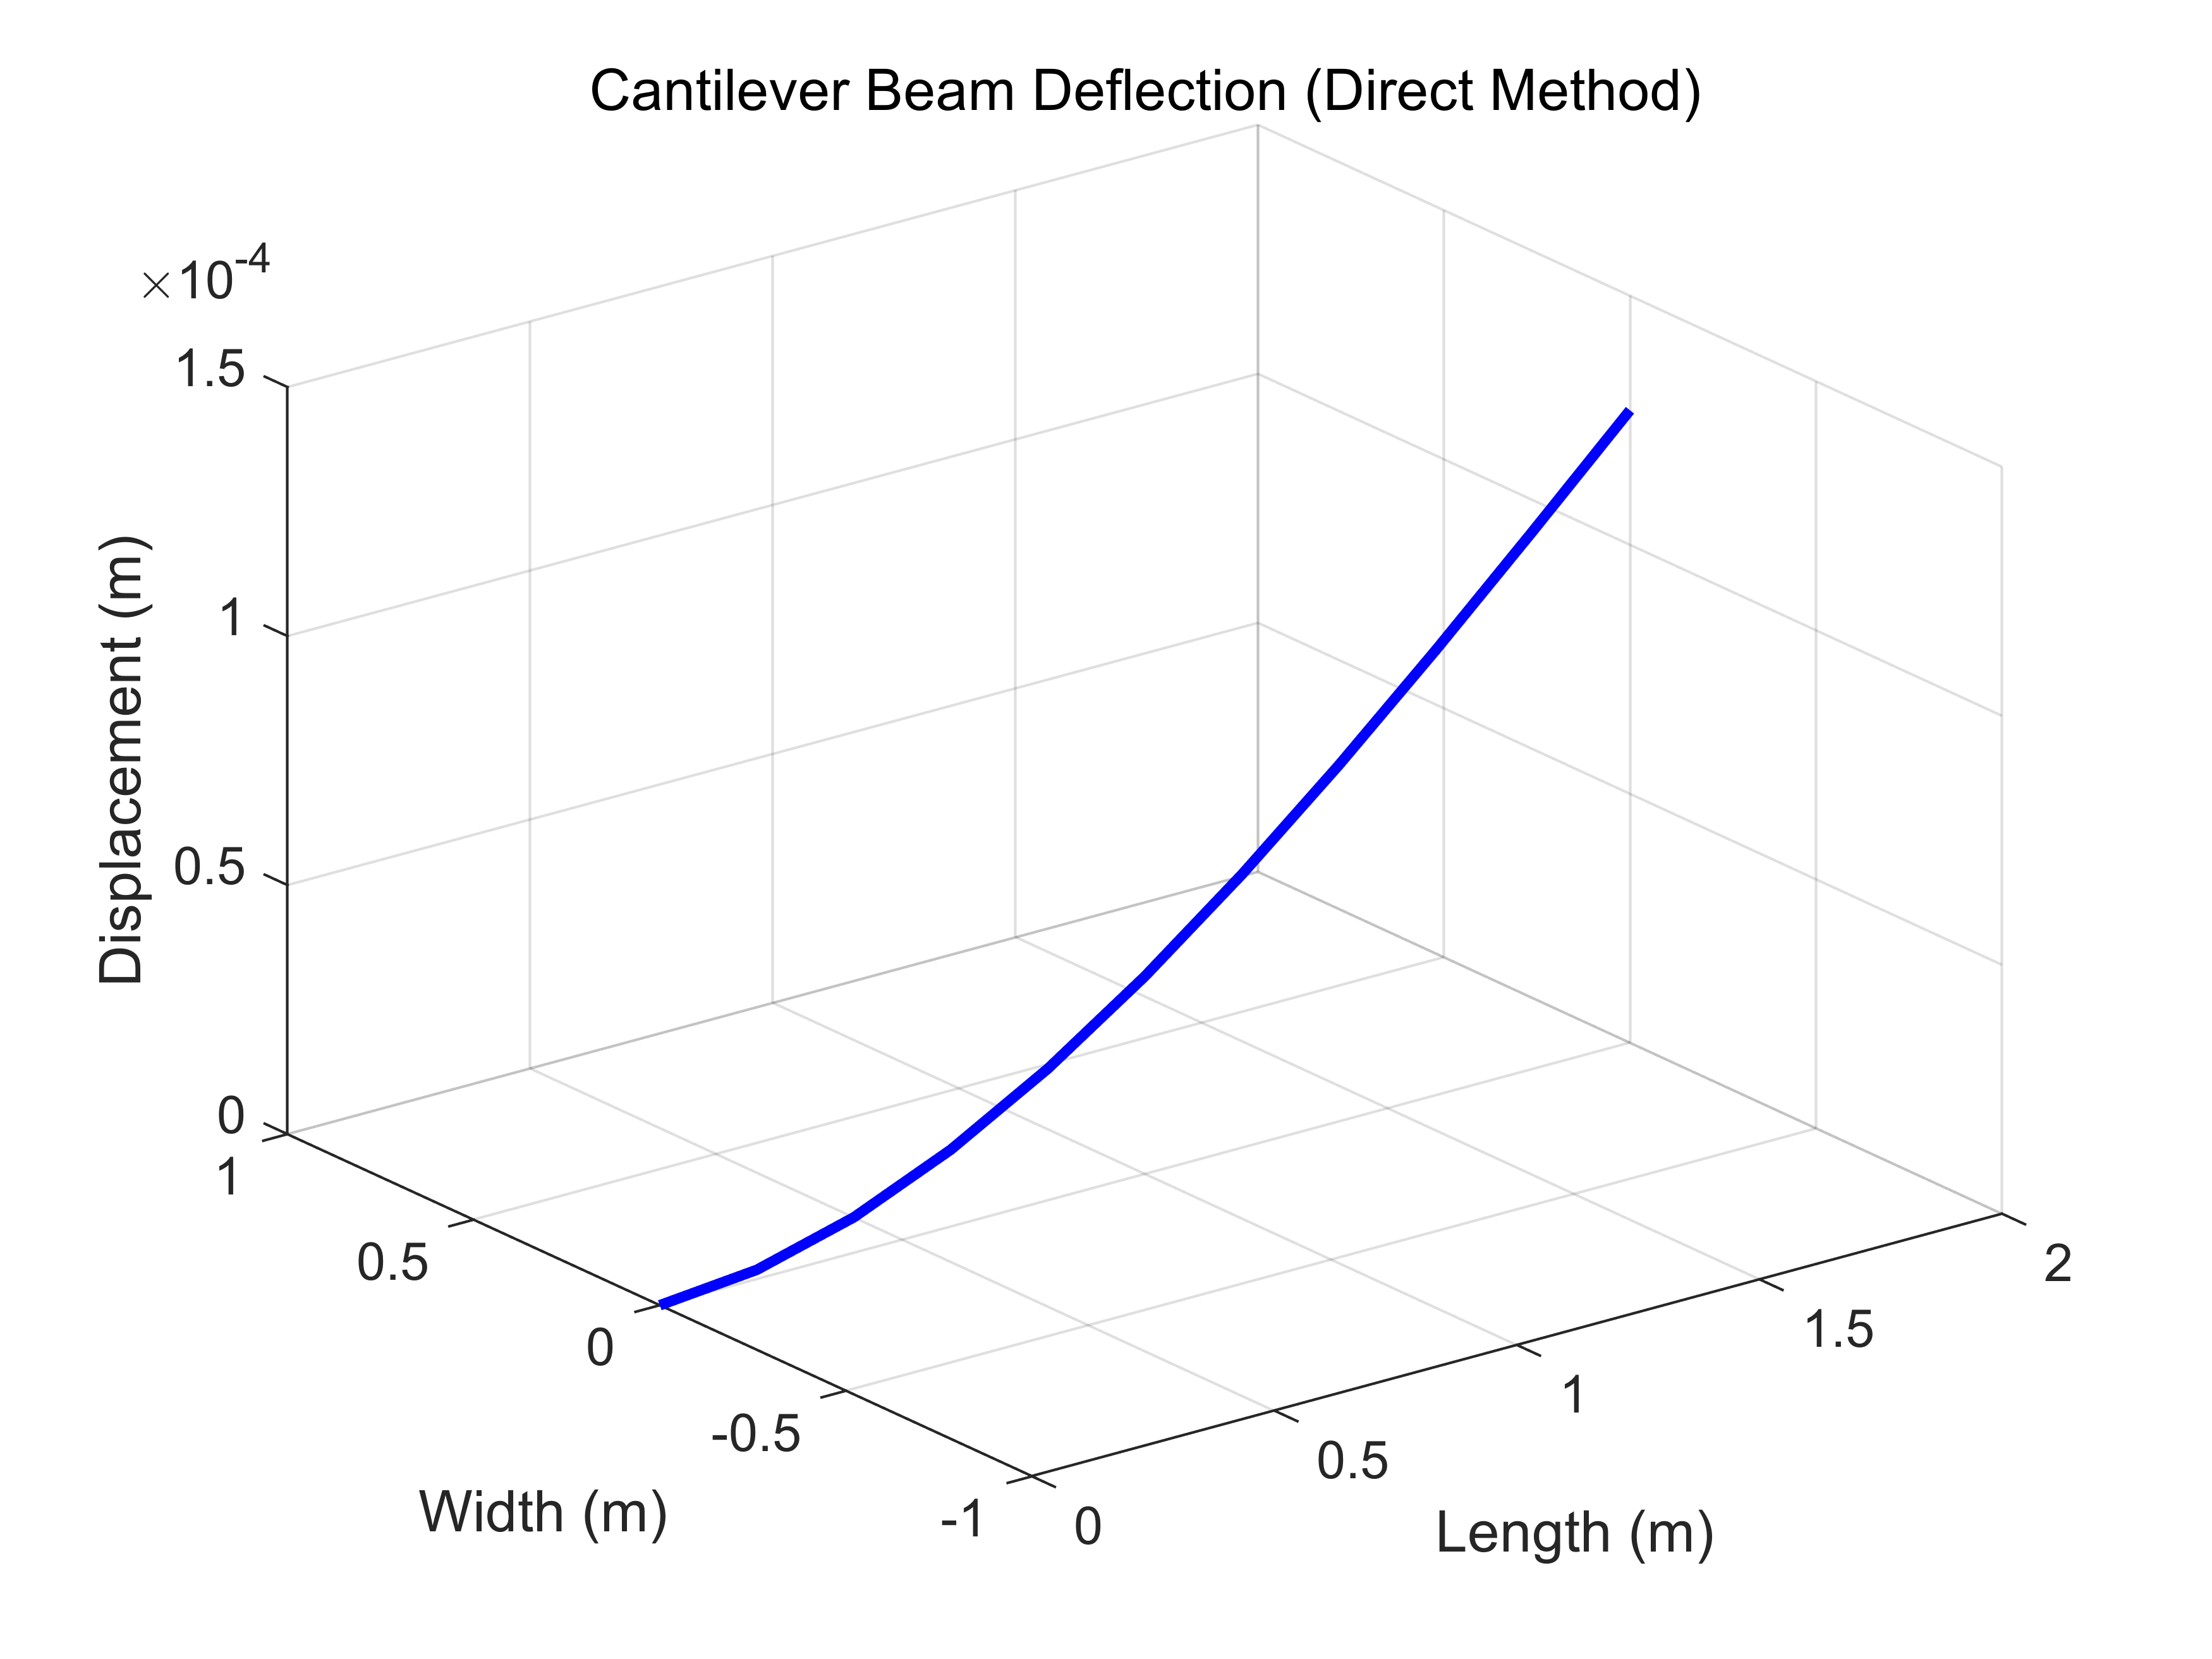

In [7]:
% 직분법을 사용한 캔틸레버 보 해석 (수정된 코드)

% 재료 및 기하학적 특성
E = 210e9; % 탄성 계수 (Pa)
L = 2; % 보 길이 (m)
I = 1e-4; % 단면 2차 모멘트 (m^4)
P = 1000; % 작용 하중 (N)

% 요소 개수와 길이 설정
num_elements = 10;
element_length = L / num_elements;

% 전체 강성 행렬 초기화
K_global = zeros(2 * num_elements + 2);

% 요소 강성 행렬 구성
for i = 1:num_elements
    k = (E * I / element_length^3) * ...
        [12, 6*element_length, -12, 6*element_length;
         6*element_length, 4*element_length^2, -6*element_length, 2*element_length^2;
         -12, -6*element_length, 12, -6*element_length;
         6*element_length, 2*element_length^2, -6*element_length, 4*element_length^2];

    % 전체 강성 행렬에 요소 강성 추가
    K_global(2*i-1:2*i+2, 2*i-1:2*i+2) = K_global(2*i-1:2*i+2, 2*i-1:2*i+2) + k;
end

% 외력 벡터 구성
F = zeros(2 * num_elements + 2, 1);
F(end-1) = P; % 마지막 노드에 하중 작용

% 경계 조건 적용 (고정 단, 첫 번째 노드 변위 0)
K_reduced = K_global(3:end, 3:end);
F_reduced = F(3:end);

% 변위 계산
u = K_reduced \ F_reduced;

% 전체 변위 벡터 구성
u_full = [0; 0; u];

% 결과 3D 시각화
x = linspace(0, L, num_elements + 1);
y = zeros(size(x));
z = u_full(1:2:end);

figure;
plot3(x, y, z, 'b-', 'LineWidth', 2);
xlabel('Length (m)');
ylabel('Width (m)');
zlabel('Displacement (m)');
title('Cantilever Beam Deflection (Direct Method)');
grid on;



**2. 변위법 (Displacement Method)**


**이론**

-  **변위법**은 구조물의 각 절점의 변위를 미지수로 사용하여 구조 해석을 진행하는 방법입니다.
-  요소의 변위를 기준으로 전체 구조의 변위를 구하고, 이를 통해 구조물 전체의 거동을 해석합니다.
-  변위법은 구조물의 변위를 직접적으로 계산하기 때문에 비선형 문제나 동적 해석에도 적합합니다.

**수식**

-  **요소 변위**: 각 요소의 변위는 노드의 변위를 통해 다음과 같이 표현할 수 있습니다.

 $\epsilon_i =\frac{du_i }{dx}$ ​​

-  $\epsilon_i$ 는 변형률, $u_i$ 는 요소 $i$ 의 변위입니다.
-  요소의 변위와 변형률 사이의 관계를 나타냅니다.

-  **응력-변위 관계**: 응력 $\sigma$ 는 변형률과 재료의 탄성 계수의 곱으로 주어집니다.

 $\sigma_i =E\epsilon_i$ ​

-  $E$ 는 재료의 탄성 계수, $\epsilon_i$ 는 변형률입니다.
-  변위법에서는 이 응력-변위 관계를 이용하여 요소의 변위와 구조 전체의 변위를 계산합니다.

-  **요소 강성 행렬**: 변위법에서 요소의 강성 행렬은 변위와 힘의 관계를 나타내며, 다음과 같이 구성됩니다.

$$k_i =\int_V B^T DB\,dV$$

-  $B$ 는 변위-변형률 행렬, $D$ 는 재료의 탄성 계수 행렬, $V$ 는 요소의 부피입니다.
-  이를 통해 각 요소의 변위를 바탕으로 힘과 모멘트를 계산할 수 있습니다.

-  **전체 구조의 변위 계산**: 각 요소의 강성 행렬을 전체 구조의 강성 행렬에 더하고, 외력 벡터를 구성하여 변위를 계산합니다.

$$K_{\textrm{global}} \delta =F$$

-  위 식에서 $\delta$ 는 변위 벡터, $K_{\textrm{global}}$ 은 전체 구조의 강성 행렬, $F$ 는 외력 벡터입니다.
-  경계 조건을 적용하여 강성 행렬을 축소하고 변위를 계산합니다.


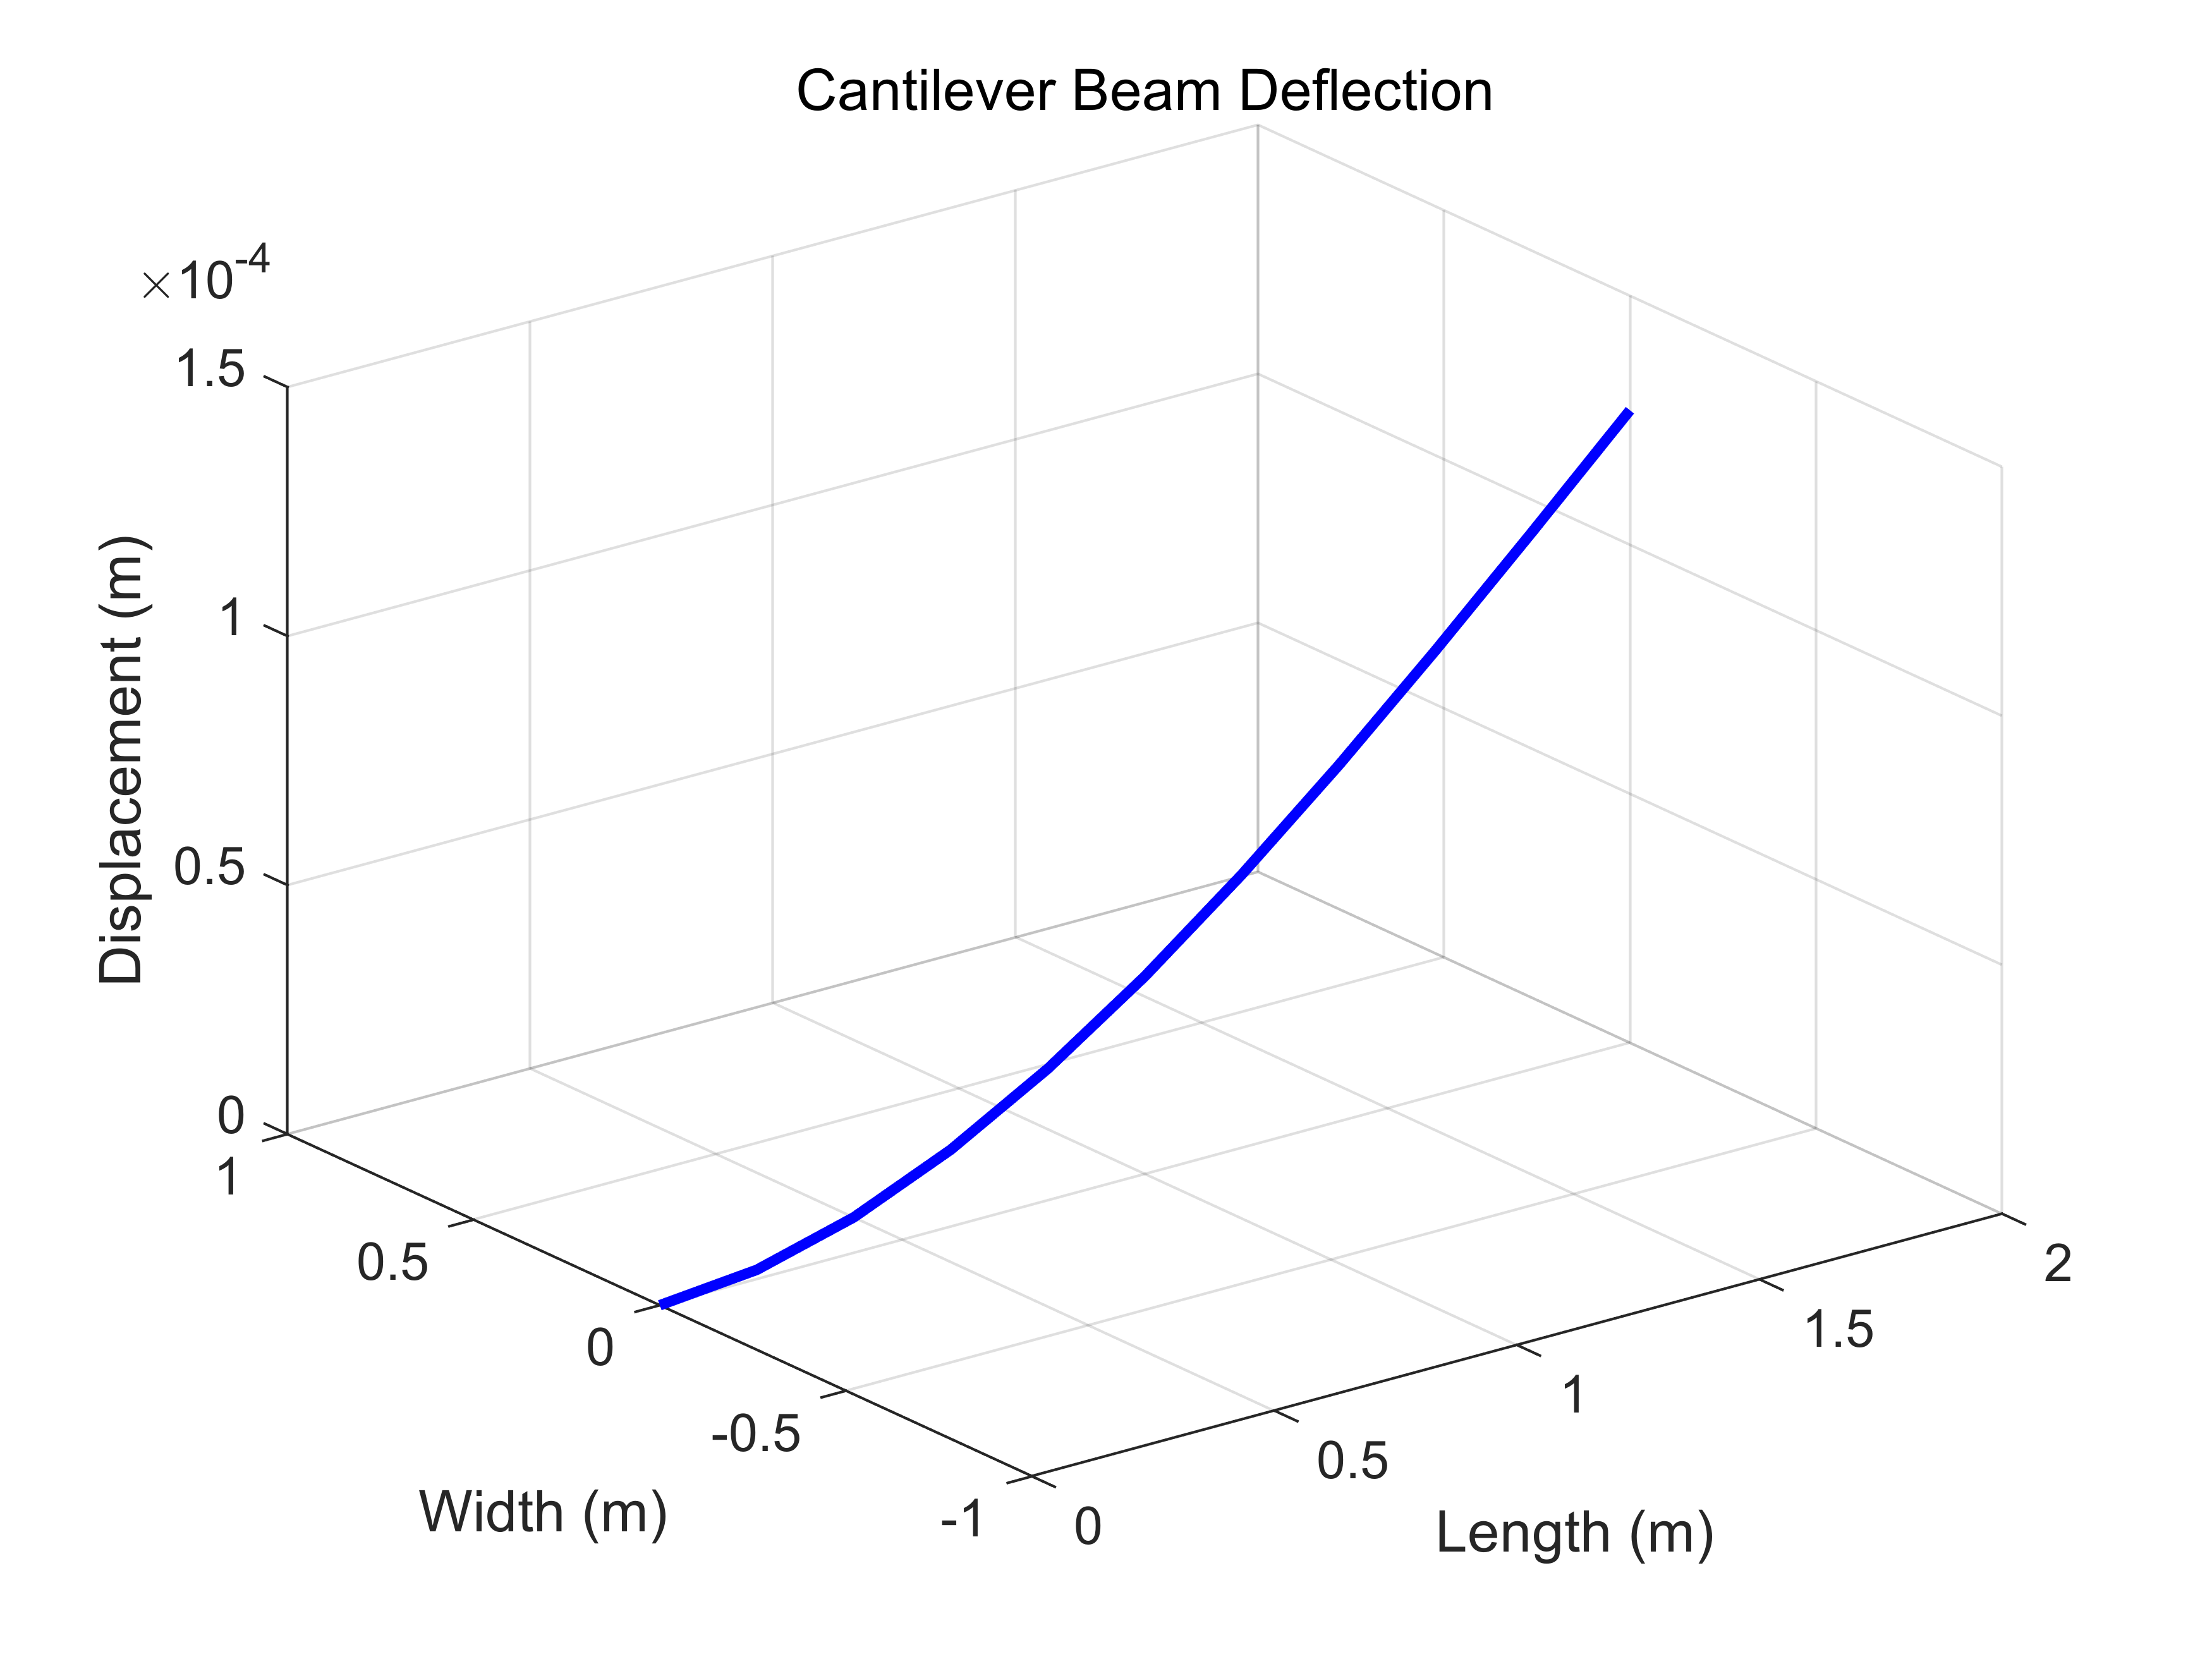

In [8]:
% 캔틸레버 보 해석 (변위법)

% 재료 및 기하학적 특성
E = 210e9; % 탄성 계수 (Pa)
L = 2; % 보 길이 (m)
I = 1e-4; % 단면 2차 모멘트 (m^4)
P = 1000; % 작용 하중 (N)

% 요소 개수와 길이 설정
num_elements = 10;
element_length = L / num_elements;

% 전체 강성 행렬 초기화
K_global = zeros(2 * num_elements + 2);

% 요소 강성 행렬 구성
for i = 1:num_elements
    k = (E * I / element_length^3) * ...
        [12, 6*element_length, -12, 6*element_length;
         6*element_length, 4*element_length^2, -6*element_length, 2*element_length^2;
         -12, -6*element_length, 12, -6*element_length;
         6*element_length, 2*element_length^2, -6*element_length, 4*element_length^2];

    % 전체 강성 행렬에 요소 강성 추가
    K_global(2*i-1:2*i+2, 2*i-1:2*i+2) = K_global(2*i-1:2*i+2, 2*i-1:2*i+2) + k;
end

% 외력 벡터 구성
F = zeros(2 * num_elements + 2, 1);
F(end-1) = P; % 마지막 노드에 하중 작용

% 경계 조건 적용 (고정 단, 첫 번째 노드 변위 0)
K_reduced = K_global(3:end, 3:end);
F_reduced = F(3:end);

% 변위 계산
u = K_reduced \ F_reduced;

% 전체 변위 벡터 구성
u_full = [0; 0; u];

% 결과 3D 시각화
x = linspace(0, L, num_elements + 1);
y = zeros(size(x));
z = u_full(1:2:end);

figure;
plot3(x, y, z, 'b-', 'LineWidth', 2);
xlabel('Length (m)');
ylabel('Width (m)');
zlabel('Displacement (m)');
title('Cantilever Beam Deflection');
grid on;


**정리**

-  **직분법**: 구조물의 각 요소의 힘과 모멘트의 평형을 통해 구조 전체의 변위를 계산합니다. 강성 행렬을 직접 구성하고, 이를 통해 변위를 구하는 방법입니다.
-  **변위법**: 구조물의 각 절점의 변위를 미지수로 사용하여 구조 해석을 진행합니다. 각 요소의 변위를 통해 전체 구조의 변위를 구하고, 이를 통해 구조물의 거동을 해석합니다.

**적용 사례**


위의 캔틸레버 보 해석에서:

-  **직분법**은 각 요소의 변형과 내부 힘을 계산하여 전체 구조의 변위를 구하는 데 사용되었습니다.
-  **변위법**은 각 노드의 변위를 미지수로 사용하여 전체 구조의 변위를 구하고, 이를 통해 구조물의 변형을 해석하는 데 사용되었습니다.

**가중 잔여법(Weighted Residual Method)**은 미분 방정식을 근사적으로 풀기 위한 수치적 기법 중 하나입니다. 이 방법은 정확한 해를 구하기 어려운 복잡한 미분 방정식에 대해 근사 해를 찾는 데 사용됩니다. 가중 잔여법은 **잔여(Residual)**를 최소화함으로써 근사 해를 구하는 것이 핵심 원리입니다.


**이론적 배경**

-  **잔여(Residual)의 정의**:

-  미분 방정식 $L(u)=f(x)$ 이 주어졌을 때, $u$ 는 정확한 해입니다.
-  근사 해 $u_h$ ​를 가정했을 때, 이를 미분 방정식에 대입하면 일반적으로 등식이 성립하지 않습니다.
-  이때 발생하는 오차를 잔여(Residual)라고 하며, 이는 다음과 같이 정의됩니다.

$$R(u_h )=L(u_h )-f(x)$$

-  **가중 함수(Weight Function)**:

-  가중 잔여법은 이 잔여를 최소화하는 방향으로 근사 해를 찾습니다.
-  가중 함수 $w_i (x)$ 를 사용하여 잔여의 가중 적분을 최소화합니다. 이는 다음과 같은 조건을 만족해야 합니다.

$$\int_{\Omega } w_i (x)R(u_h )\,dx=0~~(i=1,2,\ldots,n)$$

-  여기서 $\Omega$ 는 정의역, $w_i (x)$ 는 가중 함수입니다.
-  가중 함수는 보통 근사 해의 형태에 따라 선택되며, 흔히 사용되는 방법으로는 갤러킨 방법(Galerkin Method)이 있습니다. 갤러킨 방법에서는 근사 해의 시험 함수와 동일한 함수가 가중 함수로 사용됩니다.

-  **시험 함수(Test Function)와 근사 해**:

-  근사 해 $u_h$ ​는 보통 여러 개의 시험 함수의 선형 조합으로 표현됩니다.

$$u_h (x)=\sum_{j=1}^n a_j \phi_j (x)$$

-  여기서 $\phi_j (x)$ 는 시험 함수, $a_j$ 는 미지의 계수입니다.
-  시험 함수는 보통 다항식이나 삼각 함수 등을 사용하며, 경계 조건을 만족하도록 선택됩니다.

-  **선형 방정식의 유도**:

-  잔여의 가중 적분을 0으로 만드는 조건을 사용하면, $a_j$ 에 대한 선형 방정식의 집합을 얻을 수 있습니다.

$$\sum_{j=1}^n a_j \int_{\Omega } w_i (x)L(\phi_j (x))\,dx=\int_{\Omega } w_i (x)f(x)\,dx$$

-  이 방정식을 통해 $a_j$ 를 구할 수 있습니다.

**수식적 표현**

-  **미분 방정식**:

-  예를 들어, 1차원 열전도 방정식:

$$-\frac{d^2 u}{dx^2 }=f(x)$$

-  **근사 해**:

-  근사 해를 다음과 같이 표현합니다:

$$u_h (x)=\sum_{j=1}^n a_j \phi_j (x)$$

-  **잔여(Residual) 계산**:

$$R(u_h )=-\frac{d^2 u_h }{dx^2 }-f(x)$$

-  **가중 잔여법 적용**:

-  가중 함수 $w_i (x)$ 를 곱하고 적분합니다:

$$\int_0^L w_i (x)\left(-\frac{d^2 u_h }{dx^2 }-f(x)\right)\,dx=0~~\textrm{for}\;i=1,2,\ldots,n$$

-  **선형 시스템**:

-  미지의 계수 $a_j$ 에 대한 선형 방정식을 형성합니다:

$$\sum_{j=1}^n a_j \int_0^L w_i (x)\frac{d^2 \phi_j (x)}{dx^2 }\,dx=\int_0^L w_i (x)f(x)\,dx$$

-  이로부터 $a_j$ ​를 구합니다.

**구체적인 사례**


위의 MATLAB 예제에서는 다음과 같은 절차로 가중 잔여법을 사용하여 1차원 열전도 방정식을 풀었습니다.

1.  **시험 함수 및 가중 함수 선택**:

-  예제에서는 이차 함수 형태의 시험 함수를 선택했습니다.
-  갤러킨 방법을 사용하여 가중 함수도 동일한 형태를 사용했습니다.

1.  **강성 행렬과 외력 벡터 구성**:

-  시험 함수와 가중 함수를 사용하여 강성 행렬 $K$ 와 외력 벡터 $F$ 를 구성했습니다.
-  수식:

$$K_{ij} =\int_0^L \frac{d\phi_i }{dx}\frac{d\phi_j }{dx}\,dx$$

$$F_i =\int_0^L \phi_i (x)f(x)\,dx$$

1.  **선형 방정식 풀기**:

-  $Ka=F$ 의 선형 방정식을 풀어 근사 해의 계수 $a\_j$ 를 구했습니다.

1.  **결과 시각화**:

-  계산된 근사 해를 통해 열전도 문제의 해를 시각화하였습니다.



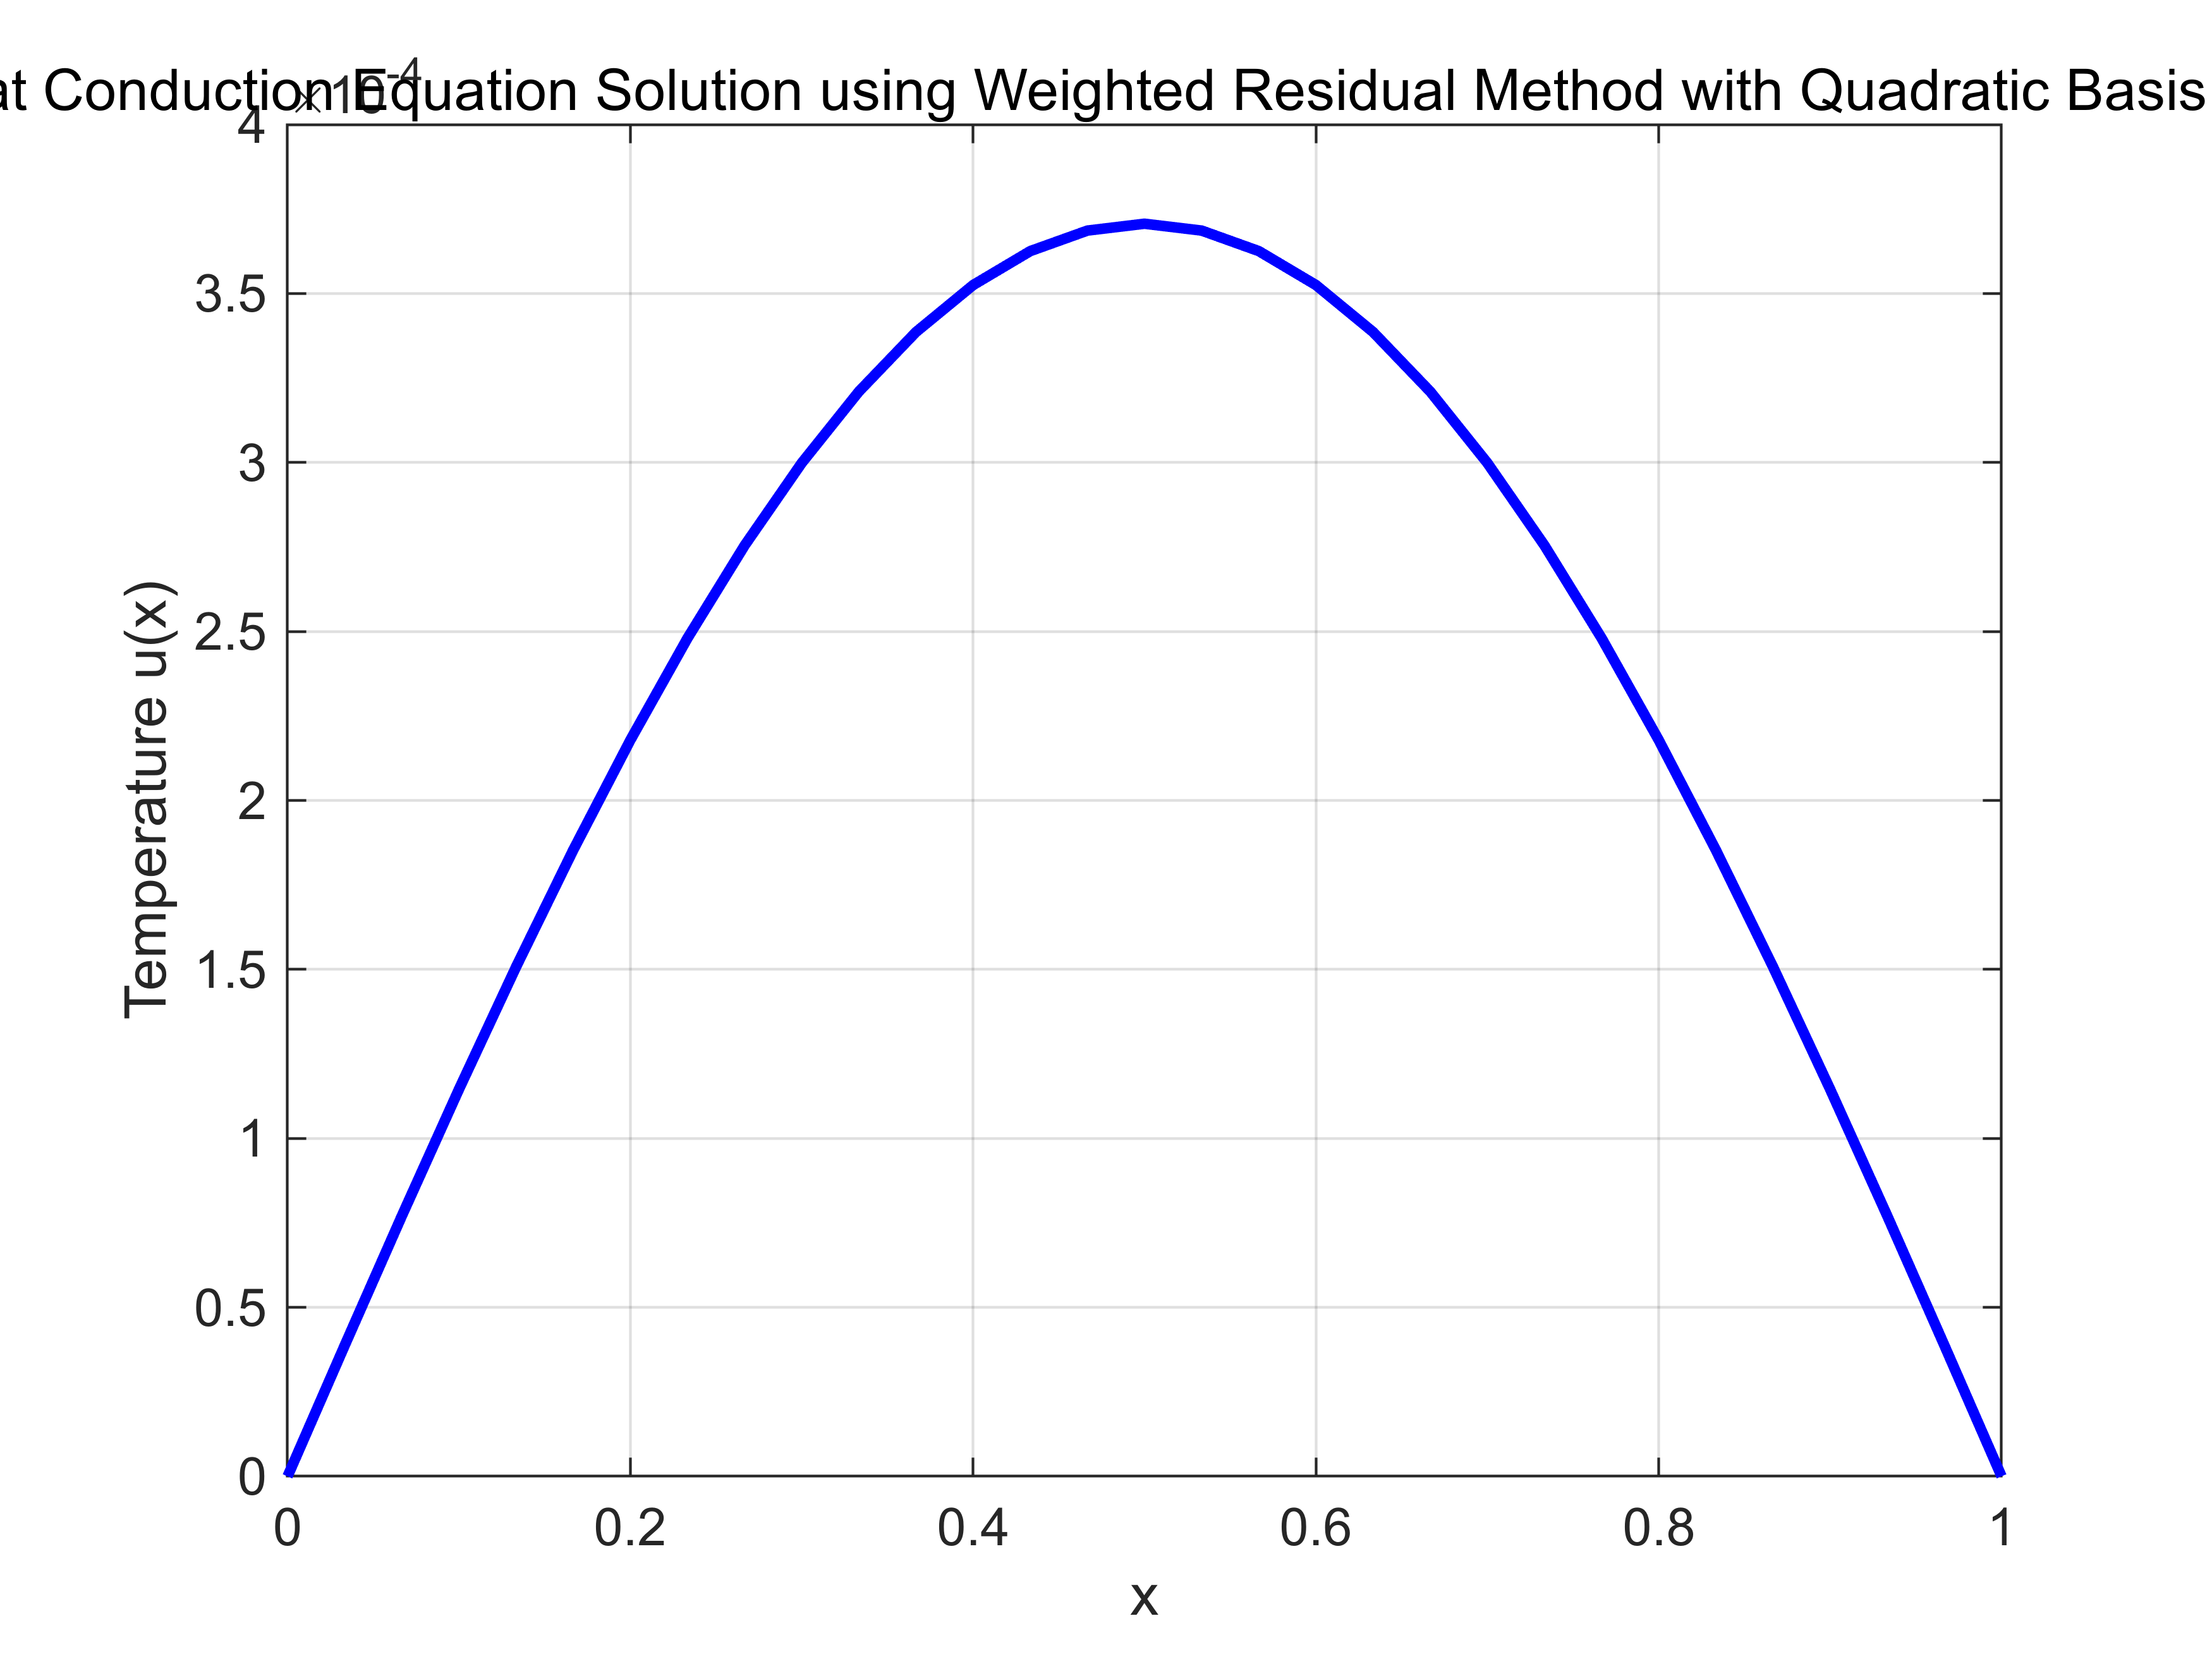

In [9]:
% 1차원 열전도 방정식의 가중 잔여법 해석 (이차 시험 함수 및 요소 수 증가)

% 도메인 설정
L = 1; % 길이
num_elements = 30; % 요소의 수
x_i = linspace(0, L, num_elements+1); % 노드 위치

% 이차 시험 함수 및 가중 함수 정의
phi = @(x, i, x_i) max(1 - ((x - x_i(i)).^2) / ((x_i(2) - x_i(1))^2), 0);

% 소스 함수
f = @(x) sin(pi * x); % 예: f(x) = sin(pi * x)

% 강성 행렬 K와 외력 벡터 F 초기화
K = zeros(num_elements+1);
F = zeros(num_elements+1, 1);

% 강성 행렬 및 외력 벡터 구성
for i = 2:num_elements
    for j = 2:num_elements
        integrand_K = @(x) dphi(x, i, x_i) .* dphi(x, j, x_i);
        K(i, j) = integral(integrand_K, x_i(i-1), x_i(i+1), 'ArrayValued', true, 'AbsTol', 1e-6, 'RelTol', 1e-3);
    end
    integrand_F = @(x) phi(x, i, x_i) .* f(x);
    F(i) = integral(integrand_F, x_i(i-1), x_i(i+1), 'ArrayValued', true, 'AbsTol', 1e-6, 'RelTol', 1e-3);
end

% 경계 조건 적용
K(1, 1) = 1;
K(end, end) = 1;
F(1) = 0;
F(end) = 0;

% 변위 계산 (LU 분해 사용)
[L, U, P] = lu(K); % LU 분해
y = L \ (P * F); % 앞방향 대입
a = U \ y; % 뒤방향 대입

% 결과 시각화
plot(x_i, a, 'b-', 'LineWidth', 2);
xlabel('x');
ylabel('Temperature u(x)');
title('1D Heat Conduction Equation Solution using Weighted Residual Method with Quadratic Basis Functions');
grid on;

In [10]:

function dp = dphi(x, i, x_i)
    % 이차 시험 함수의 미분
    dp = zeros(size(x));
    dx = x_i(2) - x_i(1);
    for k = 1:length(x)
        if i > 1 && i < length(x_i) % 인덱스가 배열 범위 내에 있는지 확인
            if x(k) >= x_i(i) - dx && x(k) <= x_i(i)
                dp(k) = -2 * (x(k) - x_i(i)) / (dx^2);
            elseif x(k) > x_i(i) && x(k) <= x_i(i) + dx
                dp(k) = 2 * (x(k) - x_i(i)) / (dx^2);
            else
                dp(k) = 0;
            end
        else
            dp(k) = 0;
        end
    end
end


-  그래프는 포물선 형태로 나타나며, $x=0$ 과 $x=1$ 에서 $u(x)$ 가 0이고, 중앙에서 최대값을 가집니다.
-  이는 경계 조건을 만족하며, 열전도 방정식의 전형적인 해의 형태를 보여줍니다.
-  $x$ 가 0.5 근처에서 $u(x)$ 의 최대값을 가지며, 이는 열이 중앙에서 가장 높게 축적된다는 것을 의미합니다.
-  열전도 문제에서 종종 관찰되는 현상으로, 일정한 열원이 작용하는 경우 열이 중앙으로 집중되는 경향이 있습니다.
-  가중 잔여법을 적용하여 얻은 해가 비교적 부드럽고 매끄럽게 수렴했음을 확인할 수 있습니다.
-  이는 시험 함수와 가중 함수를 적절히 선택하고 메쉬를 분할하여 수치적 안정성을 확보한 결과입니다.
